# API de détection d'objet #

Dans ce notebook, je vais tester les performances de différentes API de détection d'objet sur certaines images de la BD KITTI, de la BD DETRAC et de la BD CEREMA AWP.

## IBM Watson Visual Recognition ##

Lien vers l'API : https://www.ibm.com/watson/services/visual-recognition/

Il s'agit d'un service utilisant des algorithmes de deep learning pour analyser les images afin de reconnaître des scènes, des objets, des visages et d'autres contenus. 

Il est possible de customiser les classifieurs de cette API en l'entraînant sur notre propre BD d'images. 

Possède des miliers de classes et est capable de reconnaître des visages et de spécifier le genre de ce visage.

### BD KITTI ###

Commande à taper dans le terminal pour obtenir un résultat :

**curl -X POST -u "apikey:4zYJQ5Nm15GpYFpZQouon3VmA4Xjfm1SVkSf8UuLe8Ft" --form "images_file=@/Users/rblin/Downloads/data_object_image_2-2/testing/image_2/000098.png" "https://gateway.watsonplatform.net/visual-recognition/api/v3/classify?version=2018-03-19"**

Résultat de la reconnaissance avec IBM Watson Visula recognition :

**{
    "images": [
        {
            "classifiers": [
                {
                    "classifier_id": "default",
                    "name": "default",
                    "classes": [
                        {
                            "class": "pedestrian crossing",
                            "score": 0.596
                        },
                        {
                            "class": "street",
                            "score": 0.545,
                            "type_hierarchy": "/road/street"
                        },
                        {
                            "class": "road",
                            "score": 0.555
                        },
                        {
                            "class": "Crosswalk",
                            "score": 0.516
                        },
                        {
                            "class": "junction",
                            "score": 0.501
                        },
                        {
                            "class": "roadblock",
                            "score": 0.5,
                            "type_hierarchy": "/barrier/roadblock"
                        },
                        {
                            "class": "barrier",
                            "score": 0.507
                        },
                        {
                            "class": "bicycle",
                            "score": 0.589
                        },
                        {
                            "class": "sport",
                            "score": 0.597
                        },
                        {
                            "class": "vehicle",
                            "score": 0.594
                        },
                        {
                            "class": "reddish orange color",
                            "score": 0.569
                        },
                        {
                            "class": "gray color",
                            "score": 0.522
                        }
                    ]
                }
            ],
            "image": "000098.png"
        }
    ],
    "images_processed": 1,
    "custom_classes": 0
}**

Regardons maintenant l'image analysée :

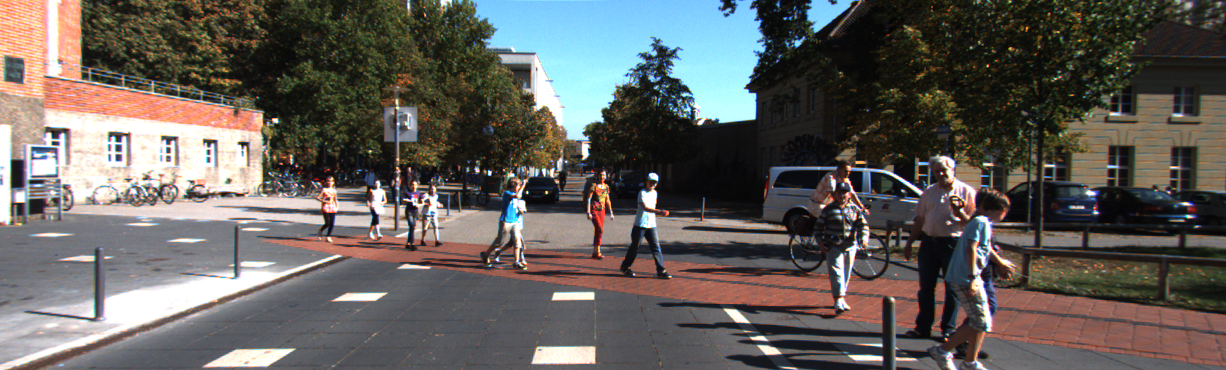

In [10]:
from IPython.display import Image
Image('/Users/rblin/Downloads/data_object_image_2-2/testing/image_2/000098.png')

L'API reconnaît donc bien les piétons qui traversent la route, les véhicules présents ainsi que le vélo. Le seul problème du retour de cette API est que l'on n'obtient que les coordonnées des bounding boxes que pour la reconnaissance faciale.

### BD CEREMA AWP ###

L'objectif est ici de voir la capacité de reconnaissance de l'API IBM Watson Visual Recognition lorsqu'il y a du brouillard

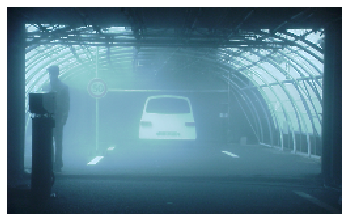

In [23]:
# Récupération des images de la BD CEREMA AWP 

import h5py
import matplotlib.pyplot as plt
from matplotlib import pylab

mon_fichier = h5py.File('/Users/rblin/Downloads/cerema0.25.hdf5', 'r')
mon_dataset_train = mon_fichier['train']
mon_dataset = mon_dataset_train['images']
image = mon_dataset[2]

fig = plt.imshow(image)
# Sauvegarder l'image sans espaces blancs autour des axes
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("/Users/rblin/Documents/images_cerema_api/2.png", bbox_inches='tight', pad_inches = 0)

Commande à taper dans le terminal pour obtenir un résultat :

**curl -X POST -u "apikey:4zYJQ5Nm15GpYFpZQouon3VmA4Xjfm1SVkSf8UuLe8Ft" --form "imagesfile=@/Users/rblin/Documents/images_cerema_api/2.png" "https://gateway.watsonplatform.net/visual-recognition/api/v3/classify?version=2018-03-19"**

Résultat de la reconnaissance avec IBM Watson Visula recognition :

**{
    "images": [
        {
            "classifiers": [
                {
                    "classifier_id": "default",
                    "name": "default",
                    "classes": [
                        {
                            "class": "bomb shelter",
                            "score": 0.755,
                            "type_hierarchy": "/enclosure/bomb shelter"
                        },
                        {
                            "class": "enclosure",
                            "score": 0.756
                        },
                        {
                            "class": "adit (tunnel)",
                            "score": 0.545
                        },
                        {
                            "class": "culvert",
                            "score": 0.503
                        },
                        {
                            "class": "ventilation shaft",
                            "score": 0.5
                        },
                        {
                            "class": "blue color",
                            "score": 0.812
                        },
                        {
                            "class": "black color",
                            "score": 0.536
                        }
                    ]
                }
            ],
            "image": "2.png"
        }
    ],
    "images_processed": 1,
    "custom_classes": 0
}**

Ici, le piéton étant situé derrière un poteau il n'a pas été reconnu et la voiture n'a pas été reconnue non plus en condition de brouillard en plein jour. Essayons de voir si le piéton est au moins reconnu lorsque celui-ci n'est pas caché.

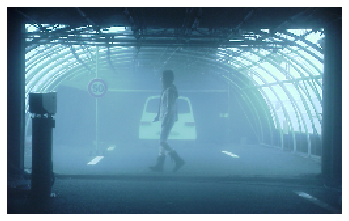

In [24]:
image = mon_dataset[3]

fig = plt.imshow(image)
# Sauvegarder l'image sans espaces blancs autour des axes
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("/Users/rblin/Documents/images_cerema_api/3.png", bbox_inches='tight', pad_inches = 0)

Commande à taper dans le terminal pour obtenir un résultat :

**curl -X POST -u "apikey:4zYJQ5Nm15GpYFpZQouon3VmA4Xjfm1SVkSf8UuLe8Ft" --form "imagesfile=@/Users/rblin/Documents/images_cerema_api/3.png" "https://gateway.watsonplatform.net/visual-recognition/api/v3/classify?version=2018-03-19"**

Résultat de la reconnaissance avec IBM Watson Visula recognition :

**{
    "images": [
        {
            "classifiers": [
                {
                    "classifier_id": "default",
                    "name": "default",
                    "classes": [
                        {
                            "class": "aqualung (for divers)",
                            "score": 0.58
                        },
                        {
                            "class": "dance",
                            "score": 0.575,
                            "type_hierarchy": "/person/dance"
                        },
                        {
                            "class": "person",
                            "score": 0.576
                        },
                        {
                            "class": "anechoic chamber",
                            "score": 0.561,
                            "type_hierarchy": "/indoors/anechoic chamber"
                        },
                        {
                            "class": "indoors",
                            "score": 0.561
                        },
                        {
                            "class": "jai alai",
                            "score": 0.544,
                            "type_hierarchy": "/sport/athletic game/court game/jai alai"
                        },
                        {
                            "class": "court game",
                            "score": 0.544
                        },
                        {
                            "class": "athletic game",
                            "score": 0.544
                        },
                        {
                            "class": "sport",
                            "score": 0.544
                        },
                        {
                            "class": "spotlight",
                            "score": 0.5,
                            "type_hierarchy": "/lamp/spotlight"
                        },
                        {
                            "class": "lamp",
                            "score": 0.5
                        },
                        {
                            "class": "blue color",
                            "score": 0.735
                        },
                        {
                            "class": "coal black color",
                            "score": 0.685
                        }
                    ]
                }
            ],
            "image": "3.png"
        }
    ],
    "images_processed": 1,
    "custom_classes": 0
}**

Ici, le piéton a bien été reconnu mais pas la voiture. Essayons de voir les résultats de Watson dans le cas de brouillard en pleine nuit.

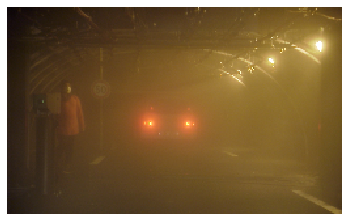

In [30]:
image = mon_dataset[8]

fig = plt.imshow(image)
# Sauvegarder l'image sans espaces blancs autour des axes
plt.axis('off')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.savefig("/Users/rblin/Documents/images_cerema_api/8.png", bbox_inches='tight', pad_inches = 0)

Commande à taper dans le terminal pour obtenir un résultat :

**curl -X POST -u "apikey:4zYJQ5Nm15GpYFpZQouon3VmA4Xjfm1SVkSf8UuLe8Ft" --form "imagesfile=@/Users/rblin/Documents/images_cerema_api/8.png" "https://gateway.watsonplatform.net/visual-recognition/api/v3/classify?version=2018-03-19"**

Résultat de la reconnaissance avec IBM Watson Visula recognition :

**{
    "images": [
        {
            "classifiers": [
                {
                    "classifier_id": "default",
                    "name": "default",
                    "classes": [
                        {
                            "class": "person",
                            "score": 0.591
                        },
                        {
                            "class": "Wildfire",
                            "score": 0.673
                        },
                        {
                            "class": "glint",
                            "score": 0.638,
                            "type_hierarchy": "/nature/light/glint"
                        },
                        {
                            "class": "light",
                            "score": 0.646
                        },
                        {
                            "class": "nature",
                            "score": 0.721
                        },
                        {
                            "class": "fairy light (christmas light)",
                            "score": 0.545,
                            "type_hierarchy": "/light source/fairy light (christmas light)"
                        },
                        {
                            "class": "light source",
                            "score": 0.715
                        },
                        {
                            "class": "floodlight",
                            "score": 0.524,
                            "type_hierarchy": "/light source/floodlight"
                        },
                        {
                            "class": "asterism (cluster of stars)",
                            "score": 0.5,
                            "type_hierarchy": "/nature/asterism (cluster of stars)"
                        },
                        {
                            "class": "reddish orange color",
                            "score": 0.902
                        },
                        {
                            "class": "coal black color",
                            "score": 0.662
                        }
                    ]
                }
            ],
            "image": "8.png"
        }
    ],
    "images_processed": 1,
    "custom_classes": 0
}**

Ici, le piéton est reconnu, la voiture n'est pas reconnue mais en revanche une source de lumière est reconnue. Ceci peut être utile au moment de l'interprétation car une source de lumière peut être attribuée aux phares des voitures.

### BD DETRAC ###

Cette BD va permettre d'évaluer la reconnaissance de l'API sur des scènes contenant beaucoup d'éléments puisque rappelons-le, DETRAC est une BD contenant des scènes routières en ville contenant un traffic intense.

L'image à analyser est la suivante : 

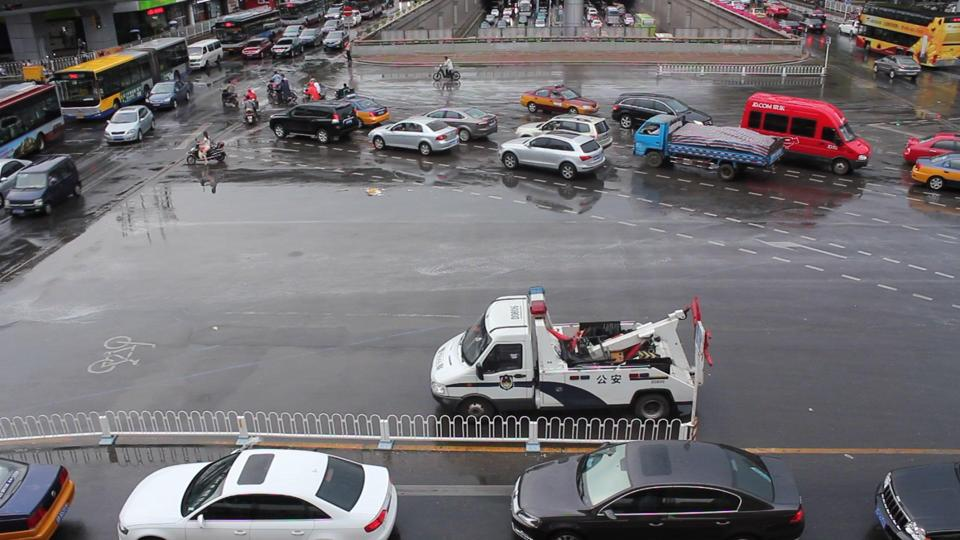

In [31]:
from IPython.display import Image
Image('/Users/rblin/Downloads/Insight-MVT_Annotation_Test/MVI_40905/img00025.jpg')

Commande à taper dans le terminal pour obtenir un résultat :

**curl -X POST -u "apikey:4zYJQ5Nm15GpYFpZQouon3VmA4Xjfm1SVkSf8UuLe8Ft" --form "imagesfile=@/Users/rblin/Downloads/Insight-MVT_Annotation_Test/MVI_40905/img00025.jpg" "https://gateway.watsonplatform.net/visual-recognition/api/v3/classify?version=2018-03-19"**

Résultat de la reconnaissance avec IBM Watson Visula recognition :

**{
    "images": [
        {
            "classifiers": [
                {
                    "classifier_id": "default",
                    "name": "default",
                    "classes": [
                        {
                            "class": "Auto Track Racing",
                            "score": 0.9,
                            "type_hierarchy": "/sport/racing/Auto Track Racing"
                        },
                        {
                            "class": "racing",
                            "score": 0.939
                        },
                        {
                            "class": "sport",
                            "score": 0.939
                        },
                        {
                            "class": "race car",
                            "score": 0.675,
                            "type_hierarchy": "/vehicle/wheeled vehicle/car/race car"
                        },
                        {
                            "class": "car",
                            "score": 0.811
                        },
                        {
                            "class": "wheeled vehicle",
                            "score": 0.811
                        },
                        {
                            "class": "vehicle",
                            "score": 0.811
                        },
                        {
                            "class": "auto racing",
                            "score": 0.502,
                            "type_hierarchy": "/sport/racing/auto racing"
                        },
                        {
                            "class": "stock car (racing)",
                            "score": 0.5,
                            "type_hierarchy": "/vehicle/wheeled vehicle/car/stock car (racing)"
                        },
                        {
                            "class": "gray color",
                            "score": 1
                        }
                    ]
                }
            ],
            "image": "img00025.jpg"
        }
    ],
    "images_processed": 1,
    "custom_classes": 0
}**

On remarque bien que l'API détecte des véhicule, mais n'ayant pas les coordonnées des bounding boxes, il est difficile de mesurer son efficacité.

### Conclusion sur IBM Watson Visual Recognition ###

L'API détecte bien les objets principaux à détecter dans l'image. Le problème pour évaluer son efficacité est que l'on ne sait pas combien ni où sont situés les objets ce qui est primordial pour le travail qui sera effectué par la suite.

## API Google Cloud Vision ##

Lien vers l'API : https://www.ibm.com/watson/services/visual-recognition/

Il s'agit ici de reconnaissance d'objets à l'aide du réseau AutoML Vision pré-entraîné mais comme pour l'API Watson, il est possible d'entraîner des modèles pour une reconnaissance personnalisée.

Elle reconnaît des milliers de classes dont des visages mais aussi les caractères d'imprimerie contenus dans les images. 

Il ne sera pas possible de tester beaucoup d'images avec cette API car il faut renseigner ses coordonnées banquaires même pour effectuer un essai gratuit.

### BD KITTI ###

Image que l'on cherche à analyser :

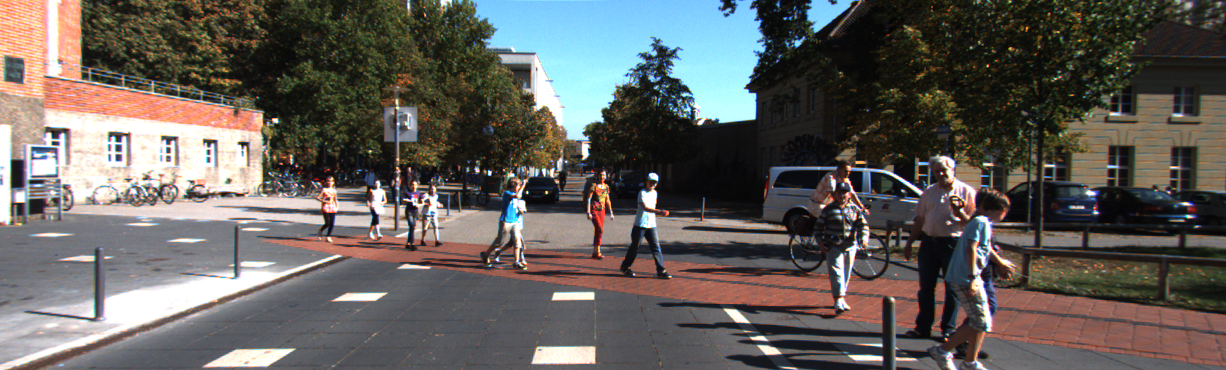

In [32]:
Image('/Users/rblin/Downloads/data_object_image_2-2/testing/image_2/000098.png')

Les résultats que l'on obitent sont les suivants :

**Etiquettes** :
- Lane  93%
- Pedestrian  90%
- Public Space  89%
- Infrastructure  87%
- Tree  87%
- City  85%
- Urban Area  83%
- Street  83%
- Town  83%
- Neighbourhood  77%
- Road  75%
- Recreation  67%
- Downtown  66%
- Walking  63%
- Plaza  63%
- Car  61%
- Campus  61%
- Vehicle  60%
- Plant  60%
- Sidewalk  57%
- Building  57%
- Pedestrian Crossing  56%
- Urban Design  52%

Encore une fois, comme pour l'API Watson, les bounding boxes ne sont pas affichées sur l'image. Les classes détectées permettent bien de décrire ce qu'il y a dans l'image mais l'absence de bounding boxes ne permet pas de décrire où sont situés les objets dans l'image. 

### BD CEREMA AWP ###

Ici, je testerai juste les images de la BD CEREMA AWP afin de voir les performances de l'API dans le brouillard, soit si celle-ci est capable de reconnaître la présence de piétons voire détecter le fait que les conditions météorologiques soient dégradées. 

Image que l'on cherche à analyser :

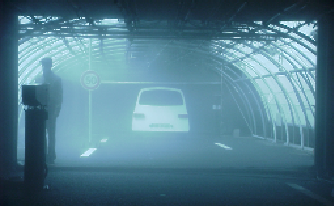

In [33]:
Image('/Users/rblin/Documents/images_cerema_api/2.png')

**Etiquettes** :
- Infrastructure  87%
- Structure  85%
- Light  83%
- Tunnel  68%
- Fixed Link  56%
- Energy  56%
- Computer Wallpaper  52%

Ici, comme pour l'API Watson, ni le piéton ni la voiture ne sont détectés. On ne détecte pas non plus la présence de brouillard. 

Essayons avec une autre image où cette fois le piéton n'est pas caché derrière un obstacle :

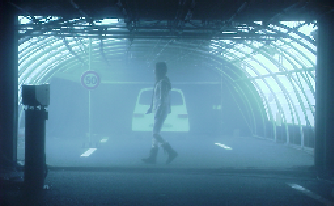

In [34]:
Image('/Users/rblin/Documents/images_cerema_api/3.png')

**Etiquettes** :
- Light  83%
- Structure  81%
- Energy  64%
- Sky  56%

Ici, une fois de plus ni le piéton ni la voiture ne sont détectés ainsi que le brouillard.

Essayons cette fois avec une image mettant en scène un piéton dans le brouillard la nuit :

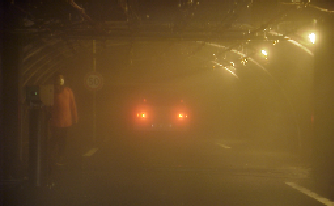

In [35]:
Image('/Users/rblin/Documents/images_cerema_api/8.png')

**Etiquettes** : 
- Light  84%
- Night  82%
- Lighting  76%
- Darkness  73%
- Geological Phenomenon  72%
- Atmosphere  72%
- Fog  68%

Ici, bien que ni le piéton ni la voiture ne soient détectés, la scène est bien caractérisée comme un tempsd e brouillard la nuit. Une fois de plus, les sources de lumière sont détectées, ce qui pourrait faciliter l'interprétation de la scène comme contenant une voiture.

### API DETRAC ###

Regardons maintenant les performances de l'API Google Cloud Vision sur une image de circulation en ville afin de voir les performances de l'API lorsqu'une image contient de nombreux objets.

Image que l'on souhaite analyser : 

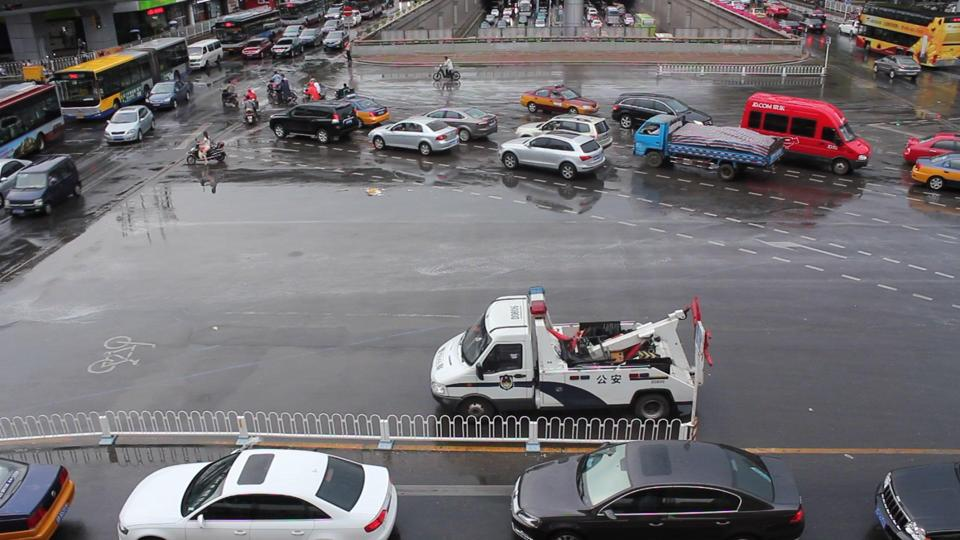

In [36]:
Image("/Users/rblin/Downloads/Insight-MVT_Annotation_Test/MVI_40905/img00025.jpg")

**Etiquettes** :
- Car  98%
- Motor Vehicle  97%
- Vehicle  89%
- Mode Of Transport  87%
- Automotive Design  80%
- Automotive Exterior  71%
- Race Car  71%
- Sports Car  59%
- Luxury Vehicle  58%
- Racing  55%
- Porsche  53%

Ici on remarque que des voitures sont bien détectées, mais on ne connait pas leur emplacement exact, ce qui encore une fois rend les performances de l'API Google Cloud Vision difficiles à évaluer.

### Conclusions sur l'API Google Cloud Vision ###

Cette API permet d'avoir de bons renseignements sur le contexte et les objets que contient une image en général, mais l'absence de la position exacte des éléments contenus dans l'image rend ses performances difficiles à évaluer à l'échelle de notre problème. 

## Conclusion générale ##

Bien que ces API permettent de décrire ce que contient une image dans sa globalité, elle ne donnent pas d'information sur la localisation exacte des objets. Elles ne rivalisent donc pas avec les autres méthodes de reconnaissance et de localisation d'objets avec lesquelles j'ai travaillé jusqu'à présent.